In [9]:
base_dir = "C:/Users/Dell/Downloads/Knee_Osteoarthritis_Predictor-main/Knee_Osteoarthritis_Predictor-main/Model_Training/Data"
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

In [ ]:
pip install keras_preprocessing

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [2]:
pip install keras_preprocessing


Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [10]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [11]:
 1574 + 737

2311

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [13]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [14]:
 base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [15]:
base_model.trainable = False

In [16]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14840133 (56.61 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = classifier.fit(train_data_gen, epochs=15,
validation_data= val_data_gen,)

Epoch 1/15


165/165 [==============================] - 554s 3s/step - loss: 1.4650 - accuracy: 0.4588 - val_loss: 0.8194 - val_accuracy: 0.6709
Epoch 2/15
165/165 [==============================] - 621s 4s/step - loss: 0.8680 - accuracy: 0.6782 - val_loss: 0.6743 - val_accuracy: 0.7448
Epoch 3/15
165/165 [==============================] - 642s 4s/step - loss: 0.7179 - accuracy: 0.7315 - val_loss: 0.5386 - val_accuracy: 0.8152
Epoch 4/15
165/165 [==============================] - 606s 4s/step - loss: 0.5897 - accuracy: 0.7764 - val_loss: 0.6261 - val_accuracy: 0.7333
Epoch 5/15
165/165 [==============================] - 532s 3s/step - loss: 0.5190 - accuracy: 0.8048 - val_loss: 0.3585 - val_accuracy: 0.8861
Epoch 6/15
165/165 [==============================] - 495s 3s/step - loss: 0.3836 - accuracy: 0.8618 - val_loss: 0.2695 - val_accuracy: 0.9273
Epoch 7/15
165/165 [==============================] - 594s 4s/step - loss: 0.4021 - accuracy: 0.8570 - val_loss: 0.2481 - val_accuracy: 0.94

In [20]:
model_save_loc="D:/Nikhil final/trained model/VGG16(1).hdf5"
classifier.save(model_save_loc)

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
classifier.save('knee.h5')

In [17]:
#pip install Pillow

In [17]:
import numpy as np

In [22]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

165/165 - 354s - 354s/epoch - 2s/step


In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [26]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[502   0   0   1   0]
 [ 21 461   3   3   0]
 [  0   0 231   1   0]
 [  0   0   0 221   0]
 [  0   0   0   0 206]]
Accuracy: 0.982
Precision: 0.996
Recall: 0.982
F-Measure: 0.982


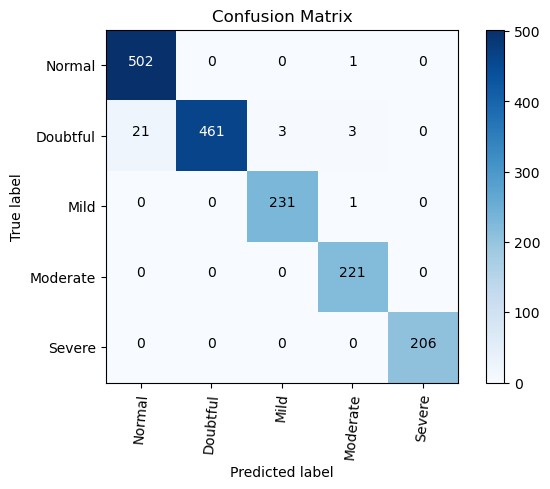

In [27]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred
  

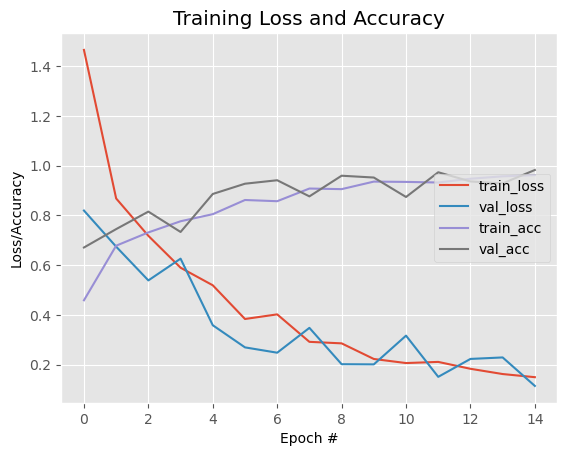

In [30]:
# plot the training loss and accuracy
N = 15 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")